## BICB 8510 Lab 1


> Author: Quincy G.

> Date: 04/26/2021, Mon







### Load Required Packages

In [85]:
import PIL
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow

### Loading Image Files

In [55]:
b7 = PIL.Image.open('images/b007.tif')
is6 = PIL.Image.open('images/is006.tif')
iv17 = PIL.Image.open('images/iv017.tif')
n50 = PIL.Image.open('images/n050.tif')

In [ ]:
is6

### Explore Image Height and Width

In [57]:
b7_size = b7.size
is6_size = is6.size
iv17_size = iv17.size
n50_size = n50.size

In [ ]:
is6_size

### Read Image Files in Numpy Arrays

In [58]:
b7_np = np.asarray(b7)
is6_np = np.asarray(is6)
iv17_np = np.asarray(iv17)
n50_np = np.asarray(n50)

In [ ]:
is6_np.shape

In [ ]:
is6_np

### Read Images from Numpy Arrays

In [59]:
is6_from_np = PIL.Image.fromarray(is6_np)

In [ ]:
is6_from_np

In [60]:
is6_np[0][3]

array([236, 228, 251], dtype=uint8)

### Explore RGB 3-Channel Images

In [82]:
def print_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

In [83]:
print_image_summary(iv17_np, ['R', 'G', 'B'])

--------------
Image Details:
--------------
Image dimensions: (1536, 2048, 3)
Channels:
R : min=31.0000, max=255.0000
G : min=13.0000, max=255.0000
B : min=120.0000, max=255.0000


#### Option 1

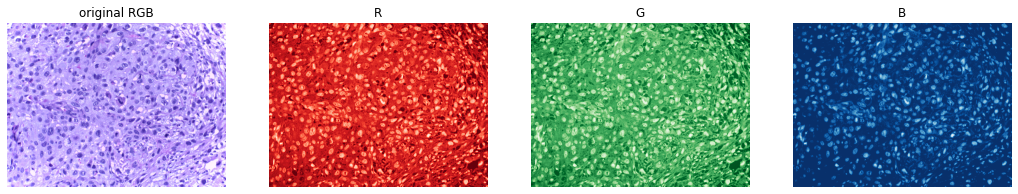

In [79]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(iv17_np) 
ax[0].axis('off')
ax[0].set_title('original RGB')
for i, cmap in enumerate(['Reds','Greens','Blues']):
    ax[i+1].imshow(iv17_np[:,:,i], cmap=cmap) 
    ax[i+1].axis('off')
    ax[i+1].set_title(cmap[0])
plt.show()

#### Option 2

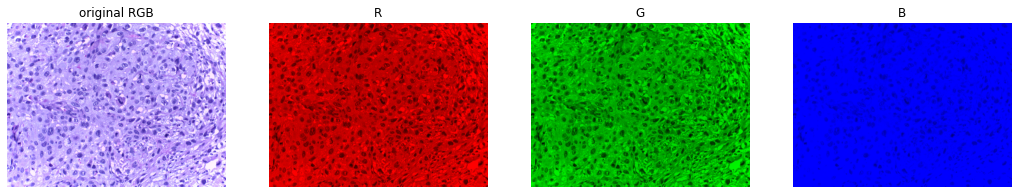

In [84]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(iv17_np/255.0) 
ax[0].axis('off')
ax[0].set_title('original RGB')
for i, lab in enumerate(['R','G','B'], 1):
    temp = np.zeros(iv17_np.shape)
    temp[:,:,i - 1] = iv17_np[:,:,i - 1]
    ax[i].imshow(temp/255.0) 
    ax[i].axis("off")
    ax[i].set_title(lab)
plt.show()

### Convert RGB-Channel Images into CIELAB Images

#### CIELAB-Channel is also a 3-Channel Images

> L: the lightness on a scale from 0 (black) to 100 (white), which in fact is a grayscale image


> a: green-red color spectrum, with values ranging from -128 (green) to 127 (red)


> b: blue-yellow color spectrum, with values ranging from -128 (blue) to 127 (yellow)



In [88]:
b7_lab = rgb2lab(b7_np / 255)
is6_lab = rgb2lab(is6_np / 255)
iv17_lab = rgb2lab(iv17_np / 255)
n50_lab = rgb2lab(n50_np / 255)

In [89]:
print_image_summary(iv17_lab, ['R', 'G', 'B'])

--------------
Image Details:
--------------
Image dimensions: (1536, 2048, 3)
Channels:
R : min=16.3124, max=100.0000
G : min=-4.7018, max=70.2407
B : min=-88.0473, max=4.7754


### Explore CIELAB Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


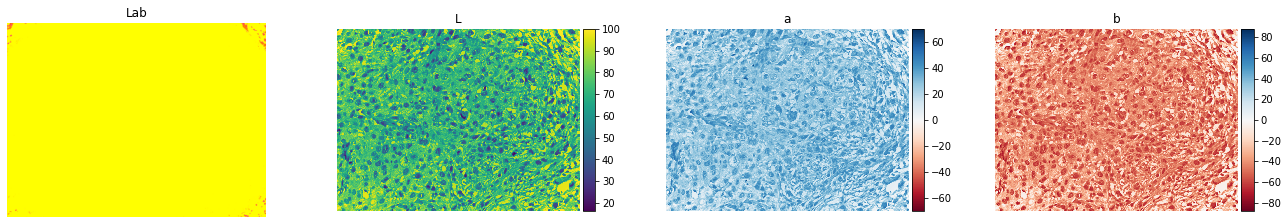

In [92]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(iv17_lab) 
ax[0].axis('off')
ax[0].set_title('Lab')
for i, col in enumerate(['L', 'a', 'b'], 1):
    imshow(iv17_lab[:, :, i-1], ax=ax[i])
    ax[i].axis('off')
    ax[i].set_title(col)
fig.show()

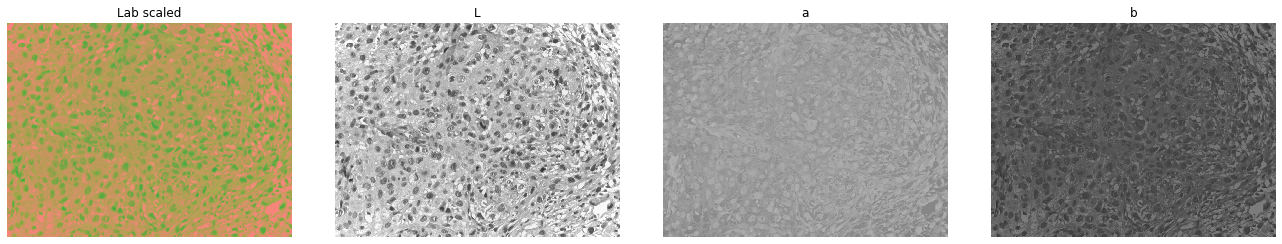

In [91]:
image_lab_scaled = (iv17_lab + [0, 128, 128]) / [100, 255, 255]
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(image_lab_scaled) 
ax[0].axis('off')
ax[0].set_title('Lab scaled')
for i, col in enumerate(['L', 'a', 'b'], 1):
    imshow(image_lab_scaled[:, :, i-1], ax=ax[i])
    ax[i].axis('off')
    ax[i].set_title(col)
    
fig.show()

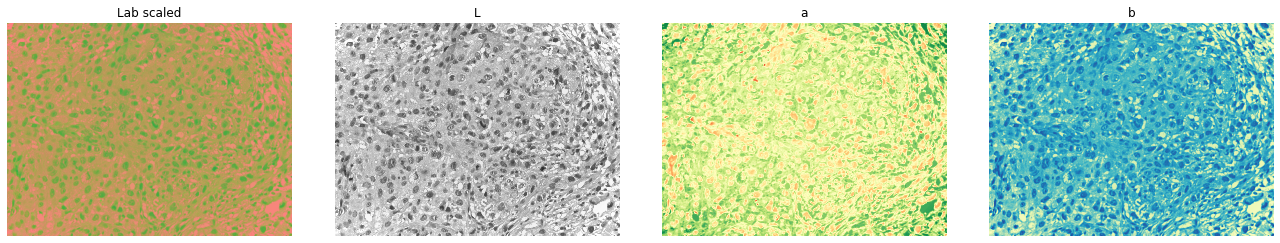

In [93]:
fig, ax = plt.subplots(1, 4, figsize = (18, 30))
ax[0].imshow(image_lab_scaled) 
ax[0].axis('off')
ax[0].set_title('Lab scaled')
imshow(image_lab_scaled[:,:,0], ax=ax[1]) 
ax[1].axis('off')
ax[1].set_title('L')
ax[2].imshow(image_lab_scaled[:,:,1], cmap='RdYlGn_r') 
ax[2].axis('off')
ax[2].set_title('a')
ax[3].imshow(image_lab_scaled[:,:,2], cmap='YlGnBu_r') 
ax[3].axis('off')
ax[3].set_title('b')
    
plt.show()

### Convert 3-Channel RGB Images into Gray-Scale Images

In [97]:
b7_gray = rgb2gray(b7_np)
is6_gray = rgb2gray(is6_np)
iv17_gray = rgb2gray(iv17_np)
n50_gray = rgb2gray(n50_np)

In [102]:
print_image_summary(iv17_gray, ['G'])

--------------
Image Details:
--------------
Image dimensions: (1536, 2048)
Channels:
G : min=0.1019, max=1.0000


### Explore Gray-Scale Images

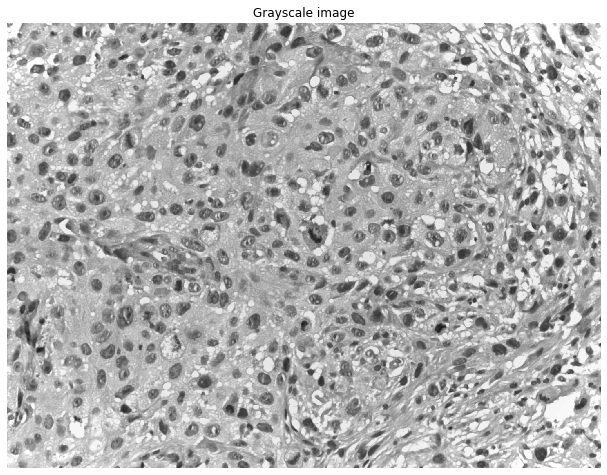

In [101]:
fig, ax = plt.subplots(figsize=(9, 16))
imshow(iv17_gray, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');